In [1]:
import alpdesign as alp
from alpdesign.seq import *
from alpdesign.mlp import *
from alpdesign.utils import *
import jax 
from jax_unirep import get_reps
import haiku as hk

In [34]:
def _deep_ensemble_loss(forward, params, seqs, labels):
    out = forward.apply(params, seqs)
    means = out[..., 0]
    stds = out[..., 1]
    n_log_likelihoods = 0.5 * \
        jnp.log(jnp.abs(stds)) + 0.5*(labels-means)**2/jnp.abs(stds)
    return jnp.sum(n_log_likelihoods, axis=0)

key = jax.random.PRNGKey(0)
seq = jnp.ones((5 ,1900))
forward = hk.without_apply_rng(hk.transform(model_forward))
params = forward.init(key, seq)
out = forward.apply(params, seq)
labels = out[...,0]

seq_grad = jax.grad(_deep_ensemble_loss, 2)(forward, params, seq, labels)
deep_loss = _deep_ensemble_loss(forward, params, seq, labels)
print(deep_loss)
print(seq_grad)

-1.243753
[[ 0.03530544  0.01821727 -0.02212866 ...  0.04356638  0.01688159
  -0.0018179 ]
 [ 0.00310536  0.00404459 -0.00560028 ...  0.00412356 -0.00282711
  -0.00071209]
 [-0.01276583 -0.0591213  -0.01162291 ...  0.06525493  0.09788166
  -0.02801391]
 [-0.05523166  0.03280498  0.05422471 ...  0.0053332   0.01868808
   0.01275704]
 [ 0.01133134  0.00471746  0.00336034 ...  0.01455054  0.00262816
  -0.00108954]]


In [2]:
def hamming(seq1, seq2): # seq1 and seq2 are of same length
    seqlist1 = list(seq1)
    seqlist2 = list(seq2)
    hamming_distance = 0.
    for i in range(len(seqlist1)):
        if seqlist1[i] == seqlist2[i]:
            continue
        hamming_distance += 1.
    return hamming_distance / len(seqlist1)

In [3]:
target = 'GIGAVLKVLTTGLPALISWIKRKRQQ'
# generate a set of sequence with length 26
seqs = ['PTWIIFLKAQWEQHSNLTNMRTFPEV',
'TISHFVCNHDICAWIKDMQAMQIKMC',
'CESWLWKRLFDGHADRWRSMPDYPIW',
'YLVENPLMFPLVAAFIHQWTRQISWH',
'QTEERLEAQISIYYIGAWSHYKVTDE',
'QADMWSQWDNLPQKPLFTEQATTWFE',
'ALICTNWFPIDLIPPVIAMIQCYRSV',
'LYKGTWQHQGPHWTDWKNVMGGEVVV',
'HCKWQHNQTQFIVDTFHNLTMYMTRL',
'KSIAHRKPKWISSINSIKFHTTCVGY',
'PFRPPFIWNRFFCWFDQDFYHCAQQF',
'WQEGVNYHGHAIEANKVEGLYYFKSH',
'LLCNSEFLHQPRRDFASHFCAKGPLR',
'VEVWRGWYKNGQNCCFCPNIYEPMAQ',
'QMEVLGMPIEHFCSYKYMSHRKNFWT',
'APQMIENAFWGHDTCEQRQASDFSFA',
'TLGTNYDWKFFLGHPQLVFHGEKYRV',
'QMMKKFMLGGYDPEIYLCNMNKVCAI',
'PLIRMKGQRAALMPADFHENITKGGH',
'TDSTRQWYKRPGQHRIEFADDSMPDV',
'KDCQGRYVNHVYDLVSIARACPPYNG',
'EFFTVPVVEVIFLSFPMKWTMTTTRF',
'PRCRKLKGRYYFNHYLVKTYIGGWLD',
'EELFVKDAKCQDVYCMNSRPIVPCEF',
'GARFVDYHMYTTCRVHTNIPREDIYR',
'SYCRMESTYCSGHNQVCRDEHPQKCQ',
'ERCGHQRVDQHRRTVVRGEIAYLVQW',
'AQICQAKSTLHGWRVILADRPNKHFY',
'DFMAWFDKNSCISTPAAQASAQAWRG',
'KDYFFKLYEYAWGKAPFPQQALRRHC',
'VYFLEEIPVPCPQAQRWQMKPYCPMN',
'CCQATNYMDYKYGLDLNKVNISHCRP',
'PAFGQLSCRTKQICIAMTFRCDTPDA',
'IWNIYVISWVRPDAKHDDATKFYPCR',
'IPHFGAICMLCSWGIPLMTCKVVNAA',
'CMNWWSMKYQEMPSFIIVDWNQSFAK',
'IMVKDSALKCCCGQAPCANEMNIDVQ',
'YVEVSNIWEDMGKAMQPSDLMVPQHD',
'FISNVTQRGNRDMYDMVDDMTHYIKF',
'IDRYSHDVPMTNATDVWIYYSVEMYN',
'PGATTQYFCFLPLRMEIRANPKCRKP',
'RTPLPKNFTNYAQIINGCQYFLSEDH',
'MQLLTCFMIRMKEDPAMMYFGPDNNR',
'NYPWLNGTQWASSTDFTCSSIQRCQI',
'SGDRWHFSPYHGCALAMVHPMYTWIT',
'GAHQATVGQCQTQTIEIFIHEACVGE',
'PLKIVKRCIRFIWLYHKKFWIFIFTR',
'FPTLGWPCEMPLELTYNSWISICGSD',
'QVKASGQKGISNGCPQEFHQGTLNFP',
'HIQKYHNWPNHWHCPNMNFIQTTWFR']


In [4]:
labels = []
for seq in seqs:
    labels.append(hamming(target, seq))
reps = get_reps(seqs)[0]
print(reps.shape)

(50, 1900)


In [5]:
key = jax.random.PRNGKey(37)
#key, _ = jax.random.split(key, num=2)
forward = hk.without_apply_rng(hk.transform(alp.model_forward))
params, mlp_loss = alp.ensemble_train(key, forward, reps, labels)

0
1
2
3
4
5
6
7
8
9


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt


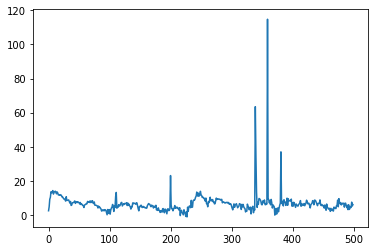

In [7]:
plt.plot(mlp_loss)